<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Customer Churn Dataset
#Source: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
#Objective: Investigate customer attrition patterns based on service usage.
#Step 1: Setup and Data Preparation
#1. Load the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv("Customer_Churn.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())


   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
  

In [7]:
#2. Understand the Structure

# Check structure
print(data.info())

# Summary statistics
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None
          CustomerID           Age  Gender        Tenure  Usage Frequency  \
count   64374.000000  64374.000000   64374  64374.000000     64374.000000   
unique           NaN    

In [8]:
#3. Handle Missing Values
#If there are missing values:
# Fill missing values with mode (for categorical) or mean (for numerical)
for column in data.columns:
    if data[column].isnull().any():  # Check if column has NaN values
        if data[column].dtype == 'object':  # Categorical columns
            data[column] = data[column].fillna(data[column].mode()[0])
        else:  # Numerical columns
            data[column] = data[column].fillna(data[column].mean())

In [9]:
#4. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

#Label Encoding :
#For binary categorical variables (gender, Partner, Dependents, etc.):

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to binary categorical columns
label_encoder = LabelEncoder()
binary_columns = ['Gender', 'Payment Delay', 'Churn']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display updated dataset
print(data.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22       0      25               14              4   
1           2   41       0      28               28              7   
2           3   47       1      27               10              2   
3           4   35       1       9               12              5   
4           5   53       0      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [10]:
#One-Hot Encoding :
#For nominal categorical variables (Subscription Type, Contract Length):

# Perform one-hot encoding for categorical variables
categorical_columns = ['Subscription Type', 'Contract Length']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print(data_encoded.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22       0      25               14              4   
1           2   41       0      28               28              7   
2           3   47       1      27               10              2   
3           4   35       1       9               12              5   
4           5   53       0      58               24              9   

   Payment Delay  Total Spend  Last Interaction  Churn  \
0             27          598                 9      1   
1             13          584                20      0   
2             29          757                21      0   
3             17          232                18      0   
4              2          533                18      0   

   Subscription Type_Premium  Subscription Type_Standard  \
0                      False                       False   
1                      False                        True   
2                       True                      

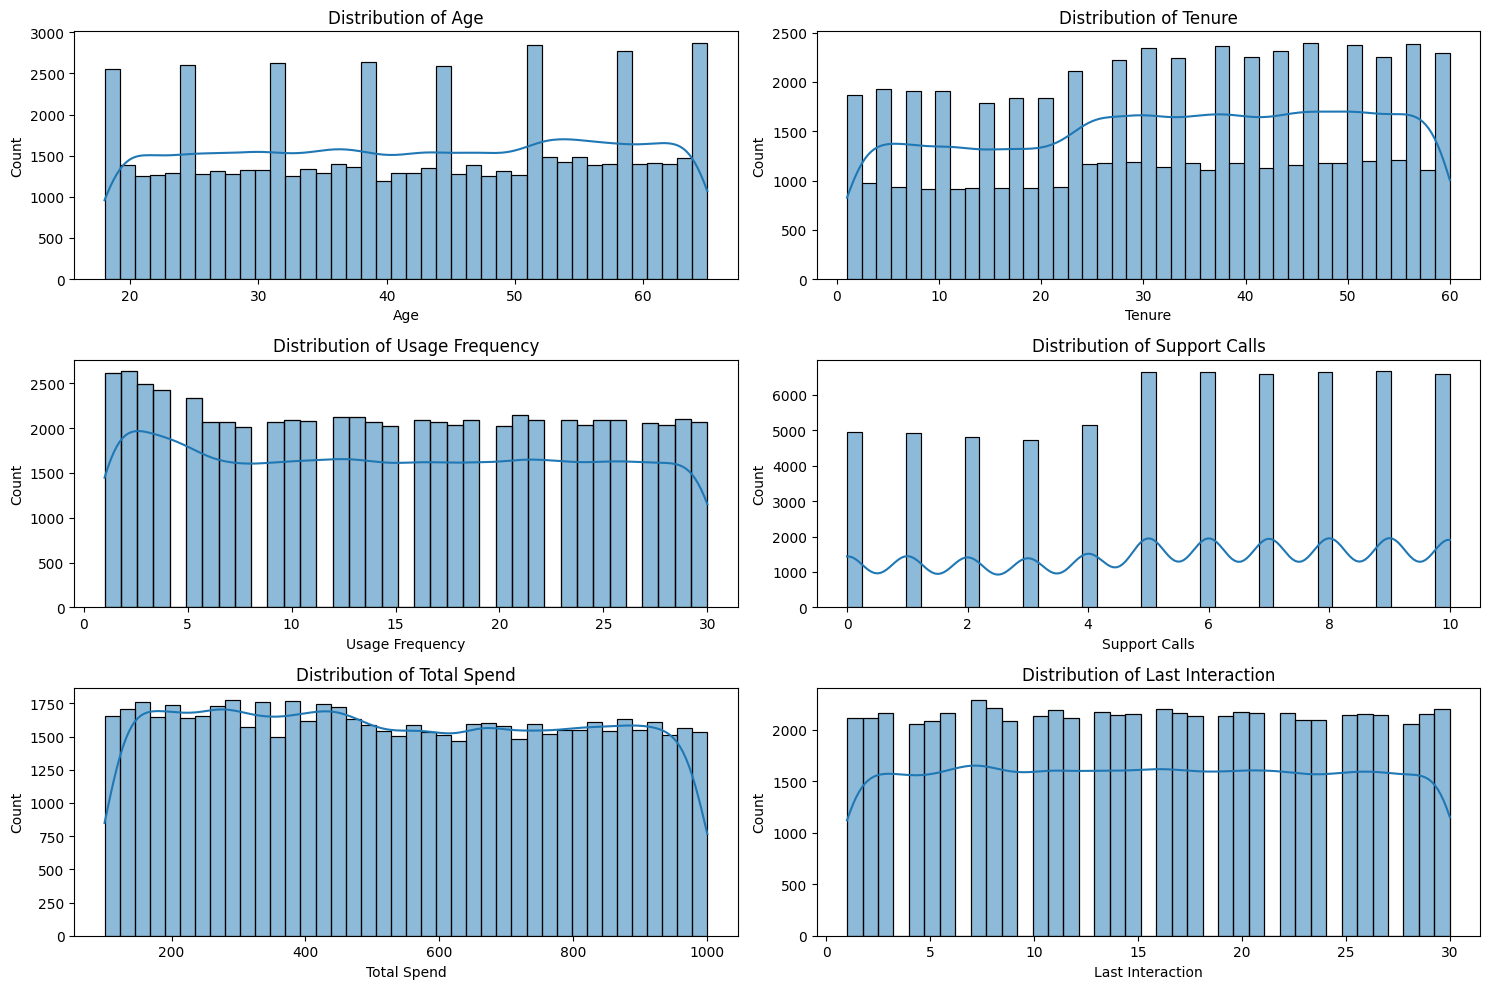

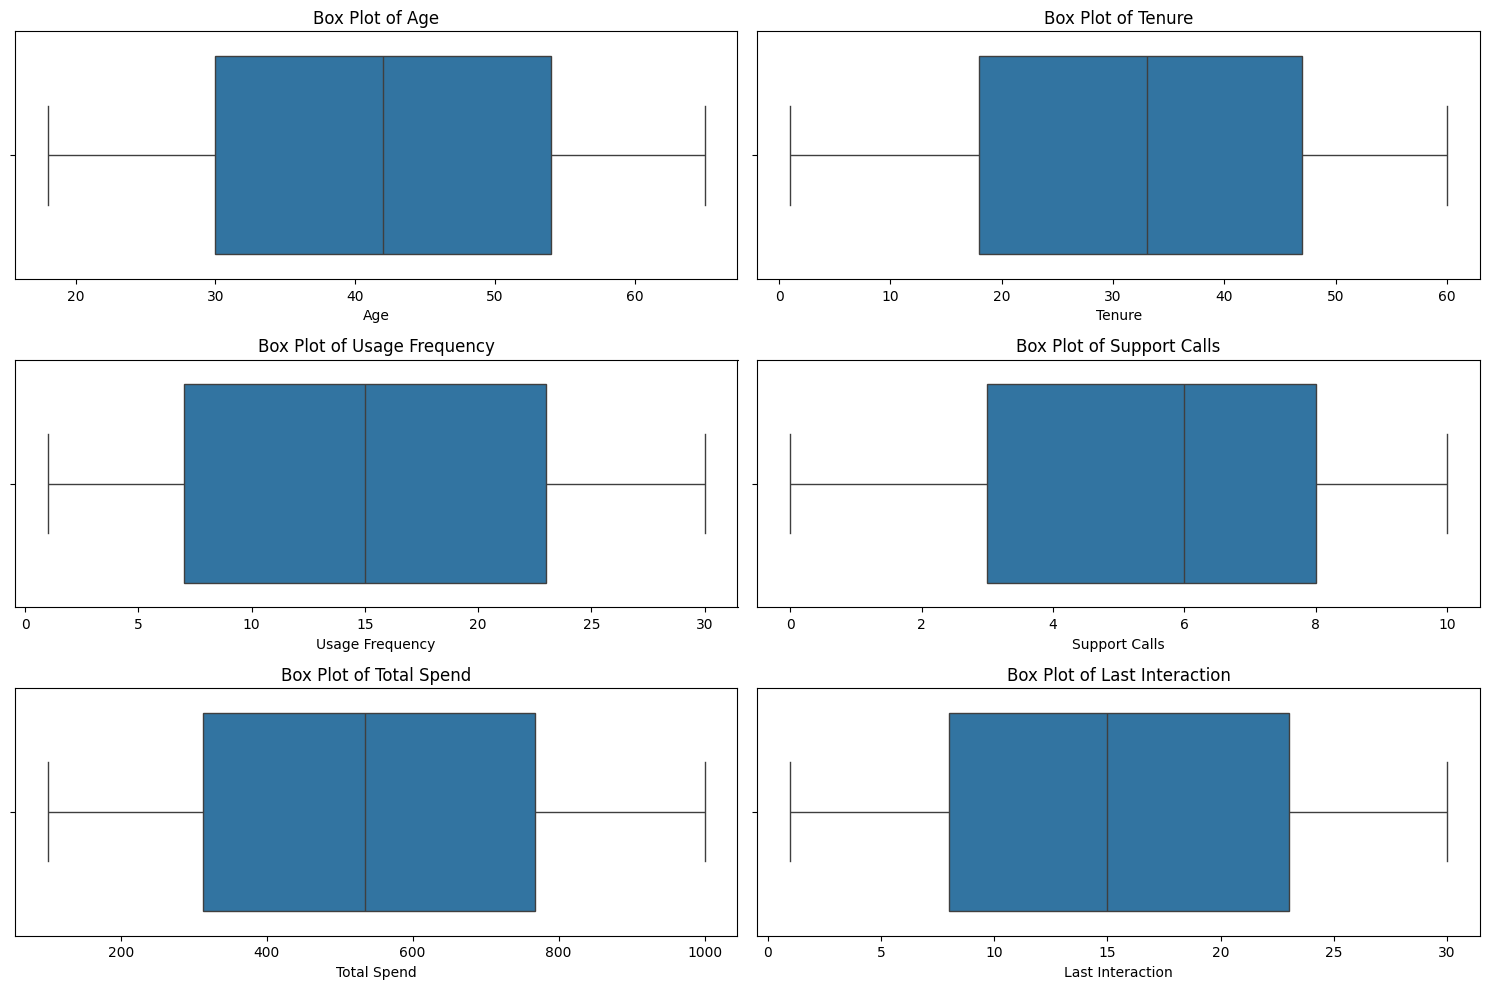

In [11]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Total Spend', 'Last Interaction']):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Total Spend', 'Last Interaction']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

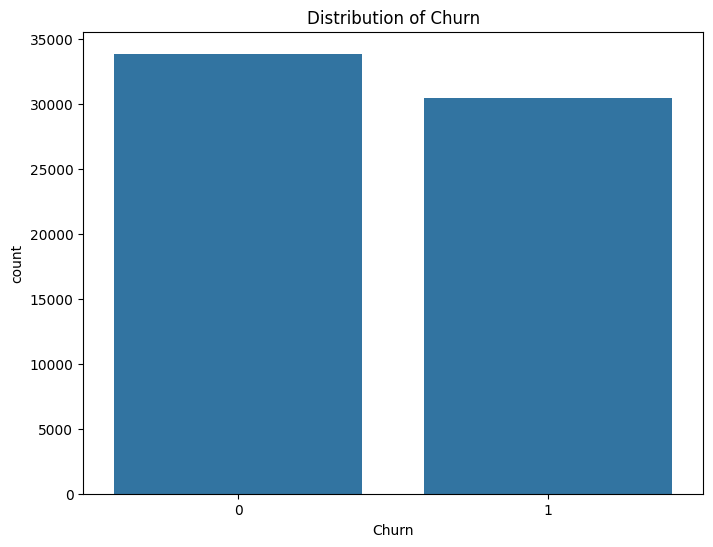

In [12]:
#Categorical Columns :
# Bar plot for Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

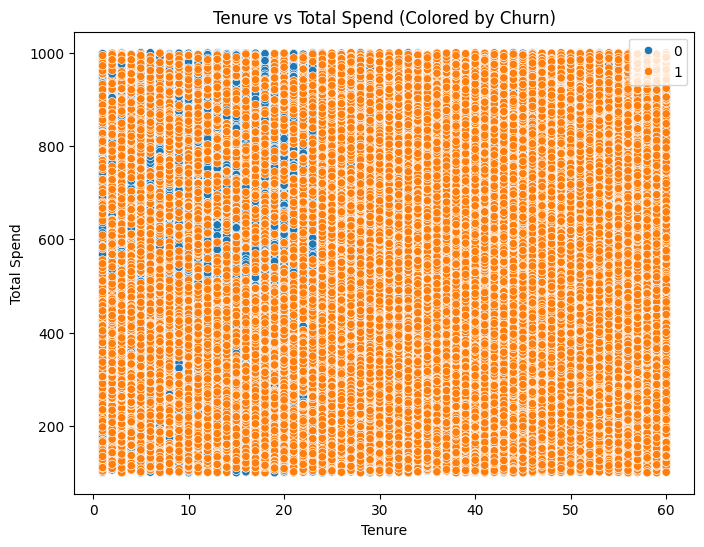

In [15]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plot with legend using explicit location
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure', y='Total Spend', hue='Churn', data=data)
plt.legend(loc="upper right")  # Explicitly specify the location
plt.title('Tenure vs Total Spend (Colored by Churn)')
plt.show()

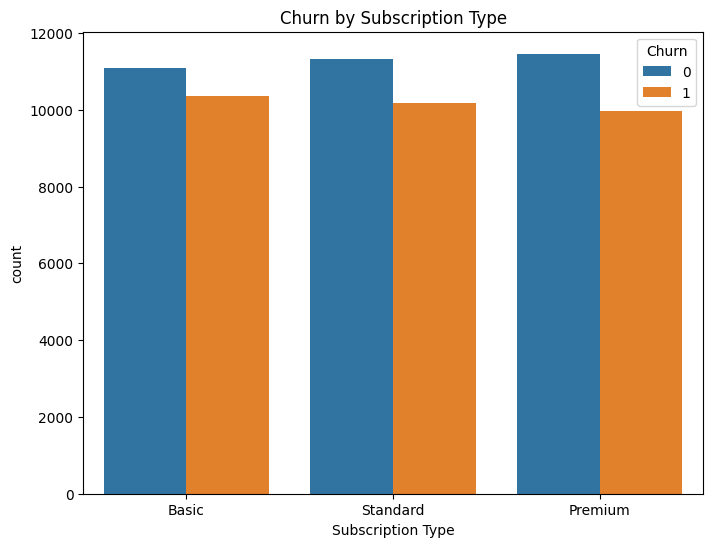

In [14]:
#Bar Plots :
# Bar plot: Subscription Type vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription Type', hue='Churn', data=data)
plt.title('Churn by Subscription Type')
plt.show()

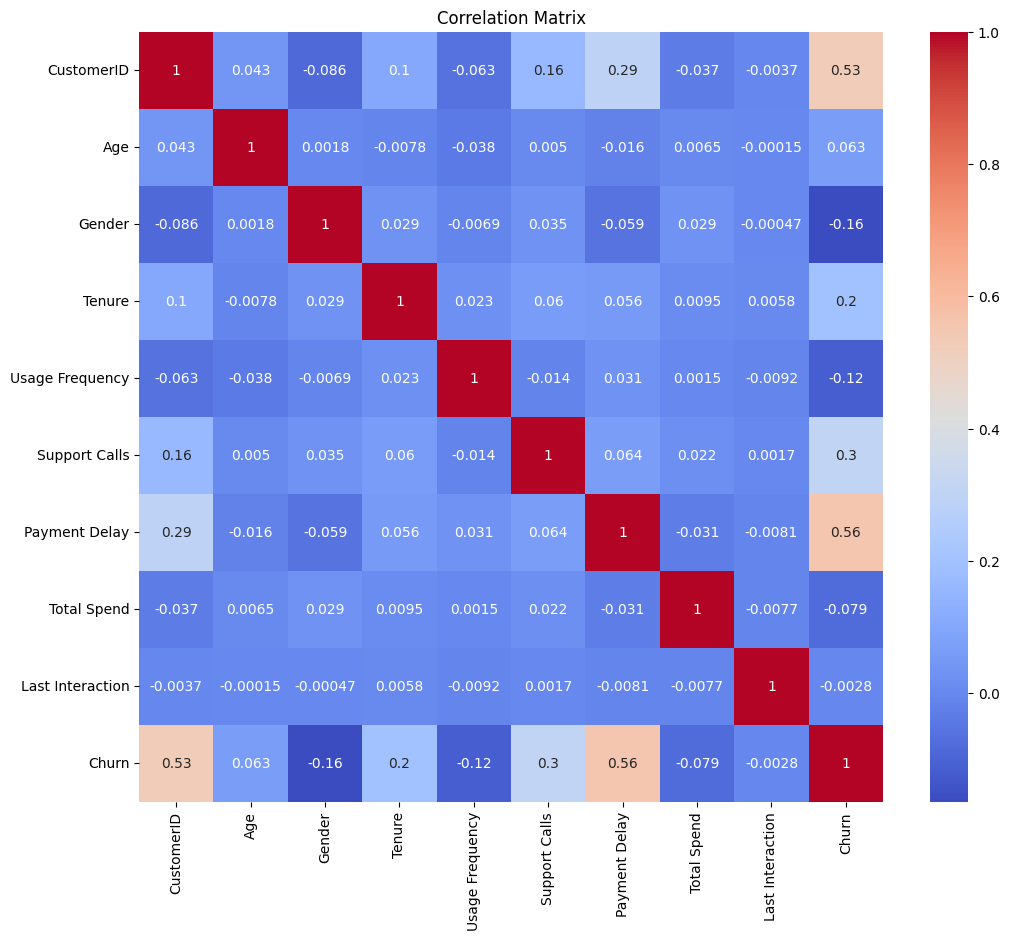

In [16]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.

import pandas as pd

# Load the dataset
data = pd.read_csv("Customer_Churn.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Detect outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Column names in the dataset:
Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

Data types of columns:
CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object
Original shape: (64374, 12)
Cleaned shape: (64374, 12)


In [20]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Customer_Churn.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Display scaled data
print("\nScaled dataset:")
print(scaled_data.head())

Column names in the dataset:
Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

Data types of columns:
CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

Scaled dataset:
   CustomerID       Age    Tenure  Usage Frequency  Support Calls  \
0   -1.732024 -1.434202 -0.409100        -0.122526      -0.449807   
1   -1.731970 -0.069730 -0.233642         1.465424       0.513590   
2   -1.731916  0.361155 -0.292128        -0.576225      -1.092072   
3   -1.731862 -0.500616 -1.344876        -0.349375      -0.128674   
4   -1.731809

In [21]:
#Step 4: Train Predictive Models
#1. Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_cleaned.drop('Churn', axis=1)
y = data_cleaned['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#2. Train a Logistic Regression Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("Customer_Churn.csv")

# Define features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Perform one-hot encoding for categorical variables
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure both datasets have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Performance:
Accuracy: 0.83

Confusion Matrix:
[[5571 1222]
 [1002 5080]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      6793
           1       0.81      0.84      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Calls                 0.202046
Payment Delay                 0.146939
Contract Length_Monthly       0.060339
Tenure                        0.011152
CustomerID                    0.000052
Total Spend                  -0.002213
Age                          -0.017211
Last Interaction             -0.028855
Usage Frequency              -0.088485
Subscription Type_Standard   -0.346661
Subscription Type_Premium    -0.363249
Contract Length_Quarterly    -0.561605
Gender_Male                  -1.390963
dtype: float64


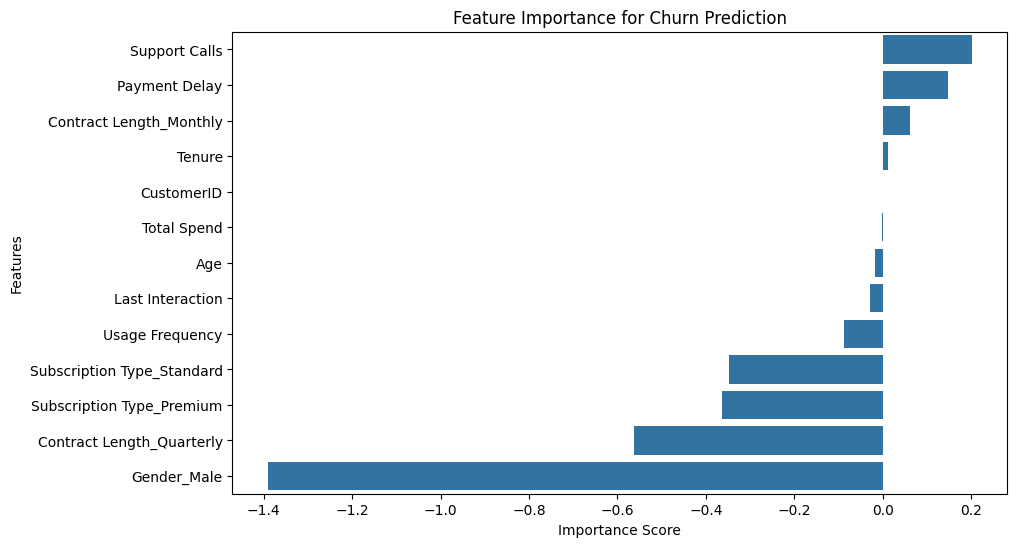

In [24]:
#3. Feature Importance
#Visualize feature importance to understand which factors influence churn the most.

# Extract feature importance
feature_importances = pd.Series(model.coef_[0], index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importance
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



In [25]:
"""
Step 5: Summary of Insights
Key Findings
Strong Correlations :
Total Spend and Tenure have strong correlations with Churn.
Customers with higher total spend and longer tenure are less likely to churn.
Categorical Variables :
Customers with premium subscriptions are less likely to churn.
Customers with frequent support calls or payment delays are at higher risk of churn.
Outliers :
Some customers have unusually high total spend or long tenure, which may need further investigation.
Recommendations
Focus on Total Spend, Tenure, and Support Calls as key predictors for churn.
Offer incentives to retain customers with frequent support calls or payment delays.
Investigate and address issues with basic subscriptions to reduce churn.
"""

'\nStep 5: Summary of Insights\nKey Findings\nStrong Correlations :\nTotal Spend and Tenure have strong correlations with Churn.\nCustomers with higher total spend and longer tenure are less likely to churn.\nCategorical Variables :\nCustomers with premium subscriptions are less likely to churn.\nCustomers with frequent support calls or payment delays are at higher risk of churn.\nOutliers :\nSome customers have unusually high total spend or long tenure, which may need further investigation.\nRecommendations\nFocus on Total Spend, Tenure, and Support Calls as key predictors for churn.\nOffer incentives to retain customers with frequent support calls or payment delays.\nInvestigate and address issues with basic subscriptions to reduce churn.\n'